# Image Recognition Using Keras-ResNet50

## About this project
We're going to use a pretrained model included in Keras to do image recognition.
Keras comes with several image recognition models including
* VGG (<a href="http://www.robots.ox.ac.uk/~vgg/" target="_blank">Visual Geometry Group at the University of Oxford</a>)
* ResNet50 (MS research)
* Inception-v3 (Google)
* Xception (Keras)

We'll use the ResNet50 in this project. <a href="https://arxiv.org/pdf/1512.03385.pdf" target="_blank">This</a> paper describes ResNets.
Check out this <a href="https://github.com/Kulbear/deep-learning-coursera/blob/master/Convolutional%20Neural%20Networks/Residual%20Networks%20-%20v1.ipynb" target="_blank">link</a> for details on the model and ResNets in general. 

We have a few images to pick from to see how well the image classifier performs 



## Import and set up model

In [1]:
import numpy as np
# from tensorflow.keras import backend
from keras.preprocessing import image
from tensorflow.keras.applications import resnet50 # <model


#Image visualization
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg



Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


In [2]:
#Now we load the imported model 
model =resnet50.ResNet50() #Create a new instance of the model 


### Details of the model layers

After we load the model we can use `summary()` to look at the model's layers and data flow structure. 

In [18]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalizationV1) (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

## Load image to predict

### Downsample the image

(351, 624, 3)


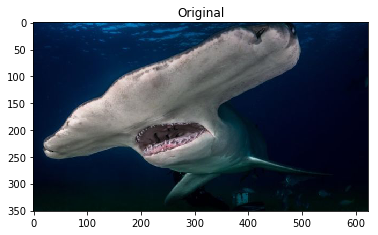

(224, 224, 3)


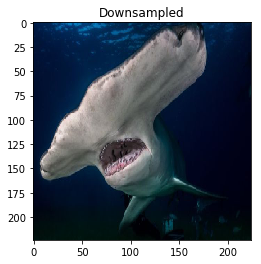

In [15]:
#Load in the sample image we want to predict
imgloc='shark.jpg'

img =image.load_img(imgloc) #Load in the image

print(shape(img))#Size of image

#Look at loaded image
plt.figure()
plt.imshow(img) 
plt.title('Original')
plt.show()  # display it



#Because the image is too big we need to downsample it in order to 
#pass it to Keras. Keras needs imagesize to be matched to 
#the number of input nodes in the model in this case 224x224 pxls 

imgName = imgloc#'bay.jpg'
#Re- Load in the sample image we want to predict
img =image.load_img(imgName, target_size=(224,224)) #Load in the image and resize


print(shape(img))#Size of image

#Look at loaded image
plt.figure()
plt.imshow(img) 
plt.title('Downsampled')
plt.show()  # display it


### More Preprocessing steps

In [16]:
#Convert image to array (flatten)
x=image.img_to_array(img)

#The neural network is actually expecting (a list) more than 1 image so we will trick it
#Add a 4th dimension to the array

x= np.expand_dims(x,axis=0)

#Normalize data to 0-1 instead of 0-255
x=resnet50.preprocess_input(x)


### Run neural network and make prediction

-hammerhead: 65.850562 % likelihood
-great_white_shark: 21.884859 % likelihood
-tiger_shark: 12.248133 % likelihood
-electric_ray: 0.006338 % likelihood
-albatross: 0.002689 % likelihood
-sturgeon: 0.002292 % likelihood
-stingray: 0.001961 % likelihood
-killer_whale: 0.001225 % likelihood
-grey_whale: 0.000721 % likelihood
-loggerhead: 0.000335 % likelihood


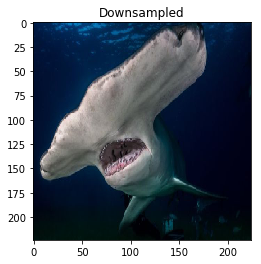

In [17]:
#Now we run the normalized data through the network and predict
predictions =model.predict(x)

#We will get back a predictions object with 1000 element array. 
#Each element reps a probability that the input matches each of the 1000 objects 
#that the network was trained on.

#Here we use a function to tell us the names of the objects that 
#the network predicted. We only want to top 10 so we ask for ony 10

prediction_classes =resnet50.decode_predictions(predictions, top=10)

#Print out all the predictions
for imagenet_id, name, likelihood in prediction_classes[0]:
    print("-{}: {:2f} % likelihood".format(name, likelihood*100))
    
#Look at loaded image
plt.figure()
plt.imshow(img) 
plt.title('Downsampled')
plt.show()  # display it

## Put it all into a function!

In [31]:
def imgClasser(locc):
    imgName = locc
    #Re- Load in the sample image we want to predict
    img =image.load_img(imgName, target_size=(224,224)) #Load in the image and resize
    
    #Convert image to array (flatten)
    x=image.img_to_array(img)

    #The neural network is actually expecting (a list) more than 1 image so we will trick it
    #Add a 4th dimension to the array

    x= np.expand_dims(x,axis=0)

    #Normalize data to 0-1 instead of 0-255
    x=resnet50.preprocess_input(x)
    
    
    #Now we run the normalized data through the network and predict
    predictions =model.predict(x)

    #We will get back a predictions object with 1000 element array. 
    #Each element reps a probability that the input matches each of the 1000 objects 
    #that the network was trained on.

    #Here we use a function to tell us the names of the objects that 
    #the network predicted. We only want to top 10 so we ask for ony 10

    prediction_classes =resnet50.decode_predictions(predictions, top=10)

    #Print out all the predictions
    for imagenet_id, name, likelihood in prediction_classes[0]:
        print("-{}: {:2f} % likelihood".format(name, likelihood*100))
    #Look at loaded image
    plt.figure()
    plt.imshow(img) 
    plt.title('Downsampled')
    plt.show()  # display it
    

# Classify Image

Finally, we use the model to identify an object in a new image. We pass the image to the model and print the top 10 most likely objects that the model thinks it is. 

-cheeseburger: 99.906200 % likelihood
-bagel: 0.070201 % likelihood
-hotdog: 0.012809 % likelihood
-bakery: 0.003466 % likelihood
-plate: 0.002827 % likelihood
-French_loaf: 0.002641 % likelihood
-chocolate_sauce: 0.000375 % likelihood
-ice_cream: 0.000308 % likelihood
-guacamole: 0.000269 % likelihood
-meat_loaf: 0.000222 % likelihood


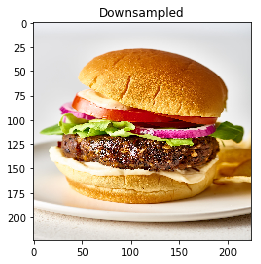

In [30]:
imgClasser('burger.jpg')

We see that the model is able to successfully identify the image as containing a **cheeseburger** with a **99.9% liklihood**!  